In [14]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:/Users/Andre/Desktop/programingfiles/parksinsons disease project/parkinsons.data")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 14)
df.head(196)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,...,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,...,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,...,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,...,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,...,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,...,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,...,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,...,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,...,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,...,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [16]:
features = df.loc[:,df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values

print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


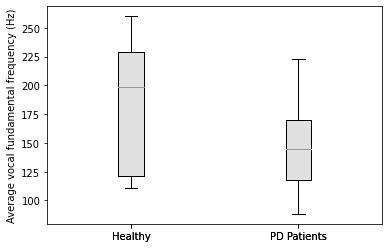

In [31]:
Healthy = df.loc[df.status == 0]['MDVP:Fo(Hz)']
PD_Patients = df.loc[df.status == 1]['MDVP:Fo(Hz)']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Average vocal fundamental frequency (Hz)')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


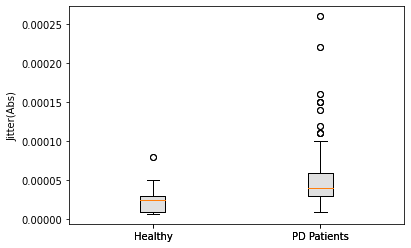

In [22]:
Healthy = df.loc[df.status == 0]['MDVP:Jitter(Abs)']
PD_Patients = df.loc[df.status == 1]['MDVP:Jitter(Abs)']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Jitter(Abs)')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


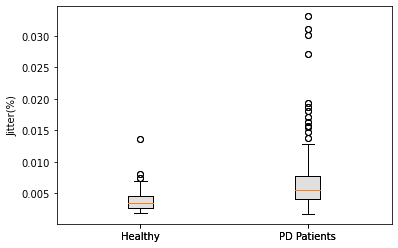

In [24]:
Healthy = df.loc[df.status == 0]['MDVP:Jitter(%)']
PD_Patients = df.loc[df.status == 1]['MDVP:Jitter(%)']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Jitter(%)')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


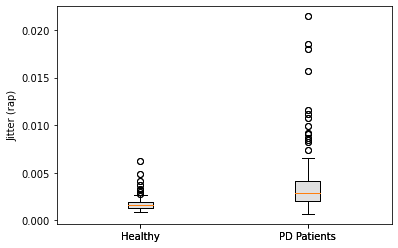

In [25]:
Healthy = df.loc[df.status == 0]['MDVP:RAP']
PD_Patients = df.loc[df.status == 1]['MDVP:RAP']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Jitter (rap)')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


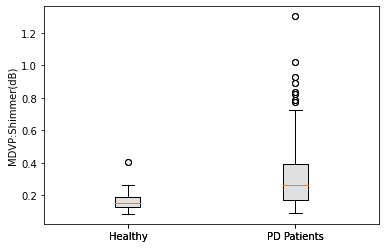

In [45]:
Healthy = df.loc[df.status == 0]['MDVP:Shimmer(dB)']
PD_Patients = df.loc[df.status == 1]['MDVP:Shimmer(dB)']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('MDVP:Shimmer(dB)')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


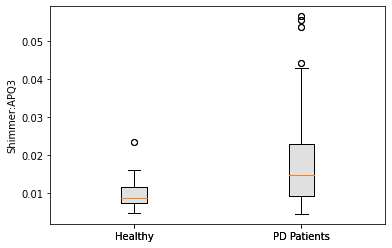

In [46]:
Healthy = df.loc[df.status == 0]['Shimmer:APQ3']
PD_Patients = df.loc[df.status == 1]['Shimmer:APQ3']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Shimmer:APQ3')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


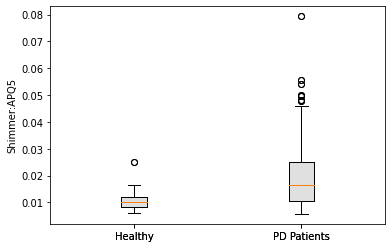

In [47]:
Healthy = df.loc[df.status == 0]['Shimmer:APQ5']
PD_Patients = df.loc[df.status == 1]['Shimmer:APQ5']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('Shimmer:APQ5')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


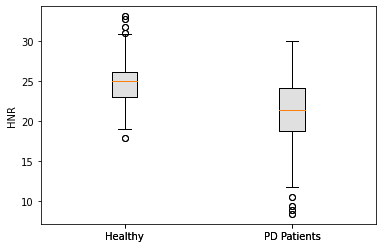

In [6]:
Healthy = df.loc[df.status == 0]['HNR']
PD_Patients = df.loc[df.status == 1]['HNR']

labels = ['Healthy', 'PD Patients']

plt.boxplot([Healthy, PD_Patients], labels = labels)

plt.ylabel('HNR')

boxes = plt.boxplot([Healthy, PD_Patients], labels = labels, patch_artist=True)

for box in boxes['boxes']:
    box.set(facecolor = '#e0e0e0')

plt.show()


In [17]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
y_prediction = model.predict(x_test)
print(accuracy_score(y_test, y_prediction)*100)


94.87179487179486
